<a href="https://colab.research.google.com/github/zyf2021/paois/blob/main/%D0%9B%D0%90%D0%91_1_%D0%9F%D0%90%D0%9E%D0%98%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

%matplotlib inline

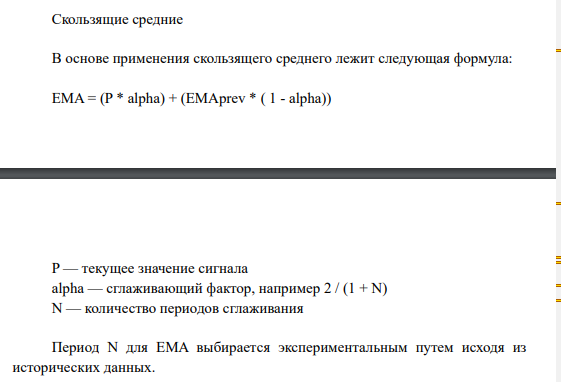

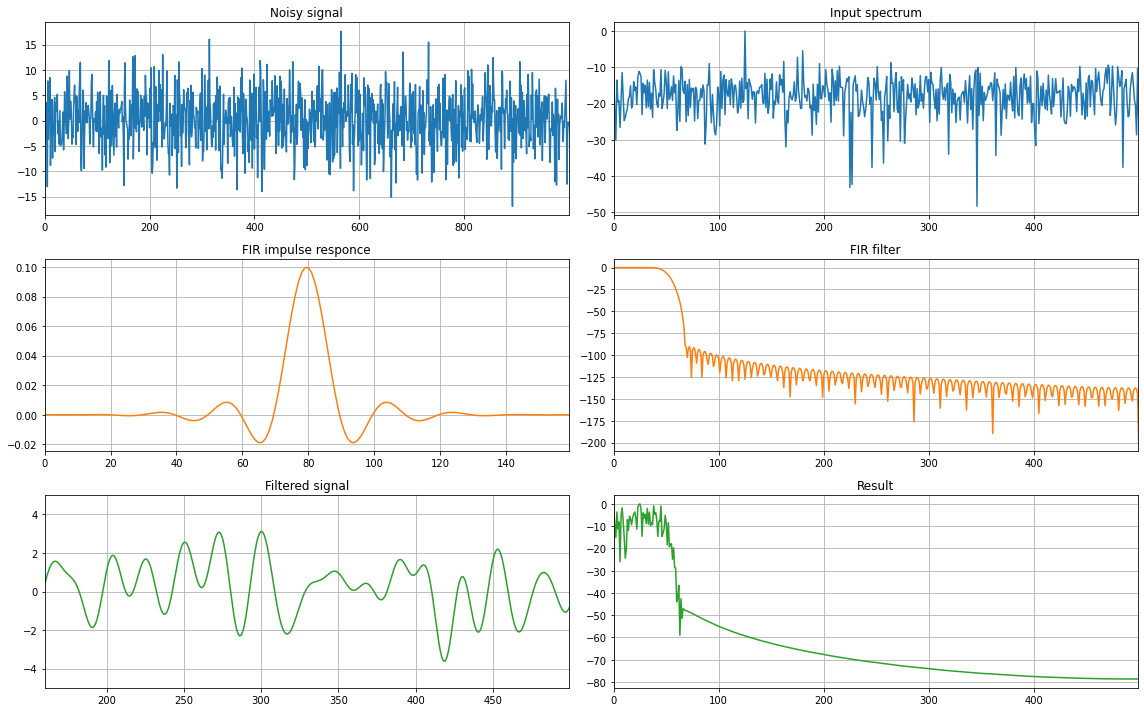

In [ ]:
n = 1000
# time vector
t = np.linspace(0, 500, n, endpoint=True)
a = [0.4, 0.98, 1.7, 0.1]
f = [0.05, 0.36, 0.25, 0.1]
# sine wave
x = a[0]*np.sin(2*np.pi*t*f[0]) + a[1]*np.sin(2*np.pi*t*f[1]) + a[2]*np.sin(2*np.pi*t*f[2]) + a[3]*np.sin(2*np.pi*t*[3])

# Add some white noise
np.random.seed(1)
xn = x + 5*np.random.randn(n)


# Kaiser FIR filter
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))
y = lfilter(h, 1, xn)

# List of input signals
lst_sig = [xn, h, y]

sig_titles = ['Noisy signal', 'FIR impulse responce', 'Filtered signal']
fft_titles = ['Input spectrum', 'FIR filter', 'Result']

plt.figure(figsize=(16, 10))
for i in range(3):
    # Calculate FFTs
    clc_fft = np.abs(fft(lst_sig[i], n)) 
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))
    
    # Plot signals
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)
    
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, n//2-1])
    plt.grid(True)
plt.tight_layout()


In [ ]:
fig = plt.figure(figsize=(16, 4), dpi=240)

plt.subplot(2,1,1)
plt.title('Analogy')
plt.plot(t, xn) 
plt.xlim([0, 500])
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)



plt.subplot(2,1,2)
plt.title('Discret')
plt.plot(t, x)
plt.stem(t, x,use_line_collection=True) 
plt.xlim([0, 500])
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)

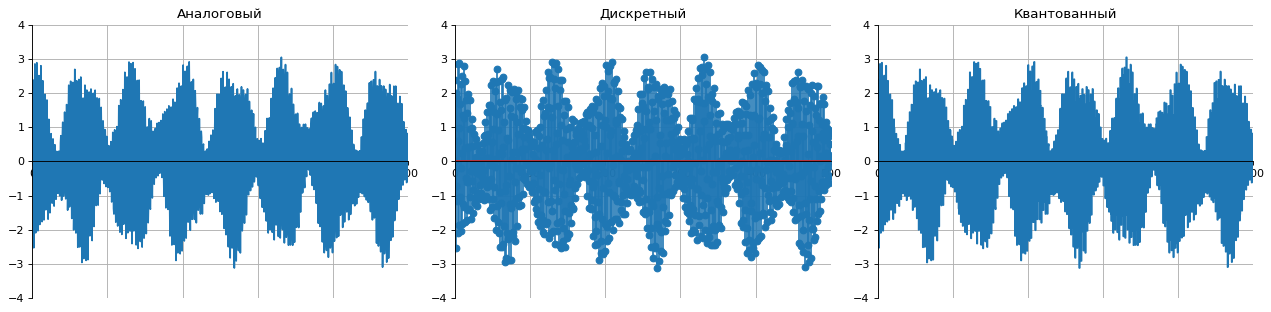

In [ ]:
n = 1000
# time vector
t = np.linspace(0, 500, n, endpoint=True)
a = [0.4, 0.98, 1.7, 0.1]
f = [0.05, 0.36, 0.25, 0.1]
# sine wave
x = a[0]*np.sin(np.pi*t*f[0]) + a[1]*np.sin(2*np.pi*t*f[1]) + a[2]*np.sin(3*np.pi*t*f[2]) + a[3]*np.sin(5*np.pi*t*[3])

# Select: plot, stem, bar
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)

# Subplot titles
t_titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Plot figures
fig = plt.figure(figsize=(16, 4), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i]) 
    plt_sel(i, t, x, use_line_collection=True)
    plt.xlim([0, 500])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)
    
    # change plot view
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
plt.tight_layout()